## Name: Aneesha Banik
## Roll number: 21052648

In [1]:

#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [2]:
#load dataset
data = pd.read_csv("Traffic.csv")

In [3]:
print(data.shape)

(2976, 9)


In [4]:
print(data.head(10))

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   
5   1:15:00 AM    10         Tuesday        44          0         5   
6   1:30:00 AM    10         Tuesday        37          0         1   
7   1:45:00 AM    10         Tuesday        42          4         4   
8   2:00:00 AM    10         Tuesday        51          0         9   
9   2:15:00 AM    10         Tuesday        34          0         4   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16

In [5]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
data = pd.get_dummies('Day of the week')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Day of the week  1 non-null      bool 
dtypes: bool(1)
memory usage: 133.0 bytes


## For training:testing = 80:20

In [3]:
# Preprocessing
# Convert 'Time' column to numerical value (e.g., hour)
data['Time'] = pd.to_datetime(data['Time']).dt.hour

# Encoding categorical variables
encoder = LabelEncoder()
data['Day of the week'] = encoder.fit_transform(data['Day of the week'])

# Features and target variable for regression
# Splitting the dataset into features and target variable
X_reg = data.drop(columns=['Time', 'Date', 'Day of the week', 'Traffic Situation'])
y_reg = data['Traffic Situation']

# Features and target variable for classification
X_cls = data.drop(columns=['Total', 'Traffic Situation'])
y_cls = data['Traffic Situation']


# Assuming 'X' contains your features and 'y' contains your labels
# Replace 'X' and 'y' with your actual feature and label data
# Replace test_size=0.2 with 0.2 if you want an 80:20 ratio

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Print the sizes of training and testing sets

print("Training set size(for regression):", len(X_train_reg))
print("Testing set size(for regression):", len(X_test_reg))

print("Training set size(for classification):", len(X_train_cls))
print("Testing set size(for classification):", len(X_test_cls))

print("Name: Aneesha Banik\n Roll number: 21052648")

Training set size(for regression): 2380
Testing set size(for regression): 596
Training set size(for classification): 2380
Testing set size(for classification): 596
Name: Aneesha Banik
 Roll number: 21052648


C:\Users\KIIT\AppData\Local\Temp\ipykernel_7996\2576670652.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time']).dt.hour


## Models for regression and classification tasks


In [12]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_cls, y_train_cls)

# Evaluate the model
y_pred = rf_model.predict(X_test_cls)
rf_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", rf_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:", busy_hours)



Accuracy: 0.9446308724832215
Busy Hours:       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
1178     6    22                2       146         23        23           4
1374     7    24                5       116         23        23           4
1091     8    21                3       139         36        40           3
2757    17     7                5       122         12        48          10
1177     6    22                2       148         35        46           1
...    ...   ...              ...       ...        ...       ...         ...
2812     7     8                6       112         33        29           3
2434     8     4                2       148         17        42           5
2040     6    31                5       129         31        36           1
2617     6     6                1       123         27        22           4
605      7    16                1       147         26        40           0

[137 rows x 7 columns]


In [28]:
# Decision Tree

# Step 1: Training the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_cls, y_train_cls)

# Step 2: Making predictions
y_pred = model.predict(X_test_cls)

# Step 3: Evaluating the model
dt_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", dt_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.924496644295302
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
1178     6    22                2       146         23        23           4
1091     8    21                3       139         36        40           3
2757    17     7                5       122         12        48          10
1177     6    22                2       148         35        46           1
1216    16    22                2       132         12        27           9
...    ...   ...              ...       ...        ...       ...         ...
2147     8     1                6       142         37        46           3
2812     7     8                6       112         33        29           3
2434     8     4                2       148         17        42           5
2040     6    31                5       129         31        36           1
2617     6     6                1       123         27        22           4

[128 rows x 7 columns]


In [29]:
# SVM
# Training the SVM model
model = SVC(kernel='linear')  
model.fit(X_train_cls, y_train_cls)

# Making predictions
y_pred = model.predict(X_test_cls)

#: Evaluating the model
svm_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", svm_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.9010067114093959
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
1178     6    22                2       146         23        23           4
414      7    14                2       109         29        23           5
1091     8    21                3       139         36        40           3
2757    17     7                5       122         12        48          10
1177     6    22                2       148         35        46           1
...    ...   ...              ...       ...        ...       ...         ...
2812     7     8                6       112         33        29           3
2434     8     4                2       148         17        42           5
2040     6    31                5       129         31        36           1
2617     6     6                1       123         27        22           4
605      7    16                1       147         26        40           0

[132 rows x 7 columns]


In [30]:
# KNN

# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

# Training the KNN model
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_scaled, y_train_cls)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
knn_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", knn_accuracy)


# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.87248322147651
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
507      6    15                3       109         14        38           1
1178     6    22                2       146         23        23           4
1374     7    24                5       116         23        23           4
414      7    14                2       109         29        23           5
1091     8    21                3       139         36        40           3
...    ...   ...              ...       ...        ...       ...         ...
2434     8     4                2       148         17        42           5
1566     7    26                4       103         28        32           1
2040     6    31                5       129         31        36           1
2617     6     6                1       123         27        22           4
605      7    16                1       147         26        40           0

[145 rows x 7 columns]


In [5]:
#LSTM

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_cls)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_encoded, test_size=0.2, random_state=0)

X_train_reshaped = X_train_cls.values.reshape((X_train_cls.shape[0], 1, X_train_cls.shape[1]))
X_test_reshaped = X_test_cls.values.reshape((X_test_cls.shape[0], 1, X_test_cls.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_cls, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_cls))

#y_pred = model.predict(X_test_reshaped)

# Evaluate the model on the test data
lstm_loss, lstm_accuracy = model.evaluate(X_test_reshaped, y_test_cls)
print("Test Loss:", lstm_loss)
print("Test Accuracy:", lstm_accuracy)


# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)



C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0913 - loss: -0.3215 - val_accuracy: 0.1007 - val_loss: -5.0913
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1048 - loss: -6.3796 - val_accuracy: 0.1007 - val_loss: -10.0029
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1031 - loss: -11.3410 - val_accuracy: 0.1007 - val_loss: -14.8385
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1125 - loss: -16.3026 - val_accuracy: 0.1007 - val_loss: -19.1661
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1039 - loss: -20.6127 - val_accuracy: 0.1007 - val_loss: -23.1322
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1070 - loss: -24.2377 - val_accuracy: 0.1007 - val_loss: -26.7338
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0965 - loss: -28.0510 - val_accuracy: 0.1007 - val_loss: -30.1874
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1023 - loss: -31.9932 - val_a

NameError: name 'y_pred' is not defined

In [32]:
# ANN

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_cls.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_cls, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
ann_loss, ann_accuracy = model.evaluate(X_test_scaled, y_test_cls)
print("Test Loss:", ann_loss)
print("Test Accuracy:", ann_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Epoch 1/10


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1829 - loss: -0.1818 - val_accuracy: 0.1008 - val_loss: -5.3518
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1138 - loss: -9.0444 - val_accuracy: 0.1071 - val_loss: -34.9916
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1431 - loss: -49.5256 - val_accuracy: 0.2269 - val_loss: -133.0110
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2509 - loss: -162.9459 - val_accuracy: 0.2647 - val_loss: -354.5908
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2640 - loss: -390.4754 - val_accuracy: 0.2668 - val_loss: -747.4883
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2922 - loss: -829.7402 - val_accuracy: 0.2794 - val_loss: -1354.0725
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2885 - loss: -1449.7278 - val_accuracy: 0.2710 - val_loss: -2217.7998
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2587 - loss: -2279.3032 - va

In [4]:
# Autoencoder

# Build the Autoencoder Model
input_dim = X_train_cls.shape[1]
encoding_dim = 32  # Set the size of the latent space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(input_layer, decoder)

# Compile the Model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
autoencoder.fit(X_train_cls, X_train_cls, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the Model
# Reconstruction loss
reconstruction_loss = autoencoder.evaluate(X_test_cls, X_test_cls)

# 6. Visualize the Reconstructed Data
reconstructed_data = autoencoder.predict(X_test_cls)

# Evaluate the model
autoenc_loss, autoenc_accuracy = model.evaluate(X_test_scaled, y_test_cls)
print("Test Loss:", autoenc_loss)
print("Test Accuracy:", autoenc_accuracy)

# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1191.9698 - val_loss: 1238.6914
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1216.4569 - val_loss: 1238.6803
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1139.0648 - val_loss: 1238.6770
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1174.8245 - val_loss: 1238.6753
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1139.5182 - val_loss: 1238.6740
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1123.7526 - val_loss: 1238.6710
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1178.7852 - val_loss: 1238.6664
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1171.9622 - val_loss: 1238.6649
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1150.8784 - val_loss: 1238.6643
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1189.8525 - val_loss: 1238.6641
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1135.9966 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


NameError: name 'model' is not defined

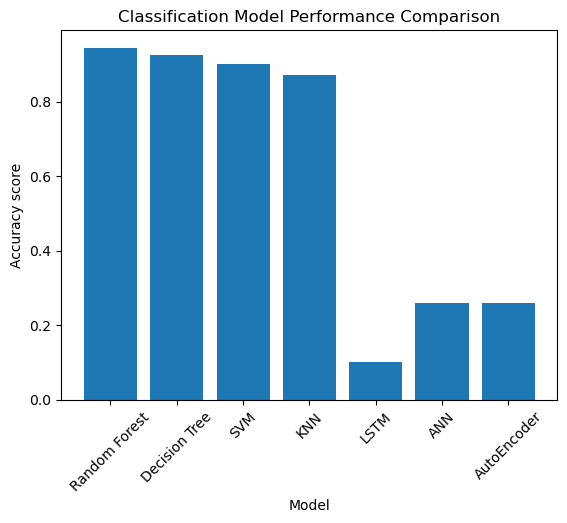

In [34]:
# Bar graph to show the best model for classification Task
cls_models = ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'LSTM','ANN', 'AutoEncoder']
cls_acc = [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy, lstm_accuracy, ann_accuracy,  autoenc_accuracy]
plt.bar(cls_models, cls_acc)
plt.title('Classification Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.xticks(rotation=45)
plt.show()

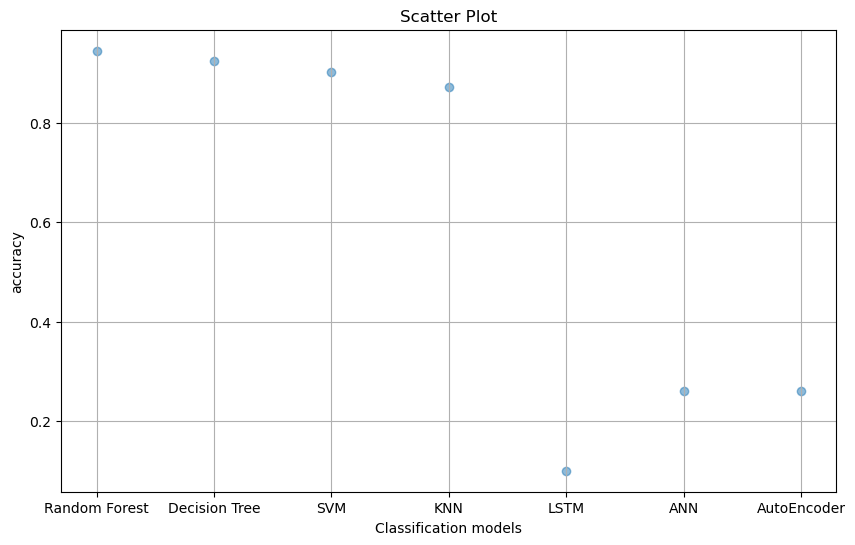

In [35]:
# Scatterplot to show the best model for classification Task
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

cls_models = ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'LSTM','ANN', 'AutoEncoder']
cls_acc = [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy, lstm_accuracy, ann_accuracy,  autoenc_accuracy]

plt.scatter(cls_models, cls_acc, alpha=0.5)  # Adjust the transparency (alpha) as needed
plt.title('Scatter Plot')
plt.xlabel('Classification models') 
plt.ylabel('accuracy')  
plt.grid(True)  

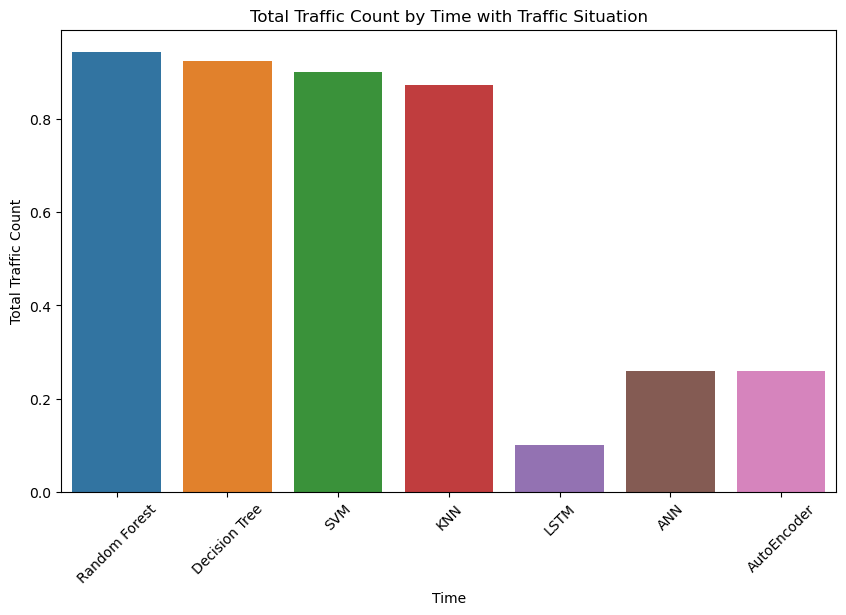

In [36]:
# Bar plot with hue to show the best model for classification Task
plt.figure(figsize=(10, 6))

data = {
    'cls_models' : ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'LSTM','ANN', 'AutoEncoder'],
    'cls_acc' : [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy, lstm_accuracy, ann_accuracy,  autoenc_accuracy],
}

sns.barplot(x='cls_models', y='cls_acc', data=data)
plt.title('Total Traffic Count by Time with Traffic Situation')
plt.xlabel('Time')
plt.ylabel('Total Traffic Count')
plt.xticks(rotation=45)
plt.show()

## For training:testing = 75:25

In [5]:
#load dataset
data = pd.read_csv("Traffic.csv")
# Preprocessing
# Convert 'Time' column to numerical value (e.g., hour)
data['Time'] = pd.to_datetime(data['Time']).dt.hour

# Encoding categorical variables
encoder = LabelEncoder()
data['Day of the week'] = encoder.fit_transform(data['Day of the week'])

# Features and target variable for regression
# Splitting the dataset into features and target variable
X_reg = data.drop(columns=['Time', 'Date', 'Day of the week', 'Traffic Situation'])
y_reg = data['Traffic Situation']

# Features and target variable for classification
X_cls = data.drop(columns=['Total', 'Traffic Situation'])
y_cls = data['Traffic Situation']


# Assuming 'X' contains your features and 'y' contains your labels
# test_size=0.25 with 0.2 if you want an 75:25 ratio

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.25, random_state=42)


print("Training set size(for regression):", len(X_train_reg))
print("Testing set size(for regression):", len(X_test_reg))

print("Training set size(for classification):", len(X_train_cls))
print("Testing set size(for classification):", len(X_test_cls))

print("Name: Aneesha Banik\n", 
      "Roll number: 21052648")



Training set size(for regression): 2232
Testing set size(for regression): 744
Training set size(for classification): 2232
Testing set size(for classification): 744
Name: Aneesha Banik
 Roll number: 21052648


C:\Users\KIIT\AppData\Local\Temp\ipykernel_7108\1051239562.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time']).dt.hour


## Models for regression and classification tasks


In [6]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_cls, y_train_cls)

# Evaluate the model
y_pred = rf_model.predict(X_test_cls)
rf_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", rf_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)


Accuracy: 0.9502688172043011
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
1178     6    22                2       146         23        23           4
1374     7    24                5       116         23        23           4
1091     8    21                3       139         36        40           3
2757    17     7                5       122         12        48          10
1177     6    22                2       148         35        46           1
...    ...   ...              ...       ...        ...       ...         ...
2815     7     8                6       115         34        37           5
2181    17     1                6       126         24        48           9
2618     6     6                1       114         30        36           2
347     14    13                0       153         50        23           3
1005    11    20                0       158         44        26           2

[168 rows x 7 columns]


In [7]:
# Decision Tree

# Step 1: Training the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_cls, y_train_cls)

# Step 2: Making predictions
y_pred = model.predict(X_test_cls)

# Step 3: Evaluating the model
dt_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", dt_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.9301075268817204
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
1178     6    22                2       146         23        23           4
1374     7    24                5       116         23        23           4
1091     8    21                3       139         36        40           3
2757    17     7                5       122         12        48          10
1177     6    22                2       148         35        46           1
...    ...   ...              ...       ...        ...       ...         ...
2815     7     8                6       115         34        37           5
2181    17     1                6       126         24        48           9
2618     6     6                1       114         30        36           2
347     14    13                0       153         50        23           3
1005    11    20                0       158         44        26           2

[160 rows x 7 columns]


In [8]:
# SVM
# Training the SVM model
model = SVC(kernel='linear')  
model.fit(X_train_cls, y_train_cls)

# Making predictions
y_pred = model.predict(X_test_cls)

#: Evaluating the model
svm_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", svm_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.9005376344086021
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
1178     6    22                2       146         23        23           4
414      7    14                2       109         29        23           5
1091     8    21                3       139         36        40           3
2757    17     7                5       122         12        48          10
1177     6    22                2       148         35        46           1
...    ...   ...              ...       ...        ...       ...         ...
2815     7     8                6       115         34        37           5
2181    17     1                6       126         24        48           9
2618     6     6                1       114         30        36           2
347     14    13                0       153         50        23           3
1005    11    20                0       158         44        26           2

[165 rows x 7 columns]


In [9]:
# KNN

# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

# Training the KNN model
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_scaled, y_train_cls)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
knn_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", knn_accuracy)


# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.8669354838709677
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
507      6    15                3       109         14        38           1
1178     6    22                2       146         23        23           4
1374     7    24                5       116         23        23           4
414      7    14                2       109         29        23           5
1091     8    21                3       139         36        40           3
...    ...   ...              ...       ...        ...       ...         ...
2815     7     8                6       115         34        37           5
2181    17     1                6       126         24        48           9
2618     6     6                1       114         30        36           2
347     14    13                0       153         50        23           3
1005    11    20                0       158         44        26           2

[186 rows x 7 columns]


In [10]:
#LSTM

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_cls)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_encoded, test_size=0.25, random_state=42)

X_train_reshaped = X_train_cls.values.reshape((X_train_cls.shape[0], 1, X_train_cls.shape[1]))
X_test_reshaped = X_test_cls.values.reshape((X_test_cls.shape[0], 1, X_test_cls.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_cls, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_cls))

#y_pred = model.predict(X_test_reshaped)

# Evaluate the model on the test data
lstm_loss, lstm_accuracy = model.evaluate(X_test_reshaped, y_test_cls)
print("Test Loss:", lstm_loss)
print("Test Accuracy:", lstm_accuracy)


# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1775 - loss: -0.6094 - val_accuracy: 0.1008 - val_loss: -5.4933
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1174 - loss: -6.5216 - val_accuracy: 0.1008 - val_loss: -11.0758
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1007 - loss: -11.5017 - val_accuracy: 0.1008 - val_loss: -15.4901
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1146 - loss: -15.8929 - val_accuracy: 0.1008 - val_loss: -19.2581
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1101 - loss: -19.8178 - val_accuracy: 0.1008 - val_loss: -22.6708
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1060 - loss: -22.6435 - val_accuracy: 0.1008 - val_loss: -26.1284
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1088 - loss: -25.6864 - val_accuracy: 0.1008 - val_loss: -29.8586
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1083 - loss: -28.5741 - val_a

In [11]:
# ANN

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_cls.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_cls, epochs=10, batch_size=32, validation_split=0.25)

# Evaluate the model
ann_loss, ann_accuracy = model.evaluate(X_test_scaled, y_test_cls)
print("Test Loss:", ann_loss)
print("Test Accuracy:", ann_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Epoch 1/10


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1229 - loss: -0.2785 - val_accuracy: 0.0842 - val_loss: -4.4101
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1316 - loss: -7.3498 - val_accuracy: 0.1254 - val_loss: -23.6147
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1883 - loss: -32.5736 - val_accuracy: 0.1953 - val_loss: -85.5692
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2646 - loss: -104.6291 - val_accuracy: 0.2473 - val_loss: -225.9810
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2728 - loss: -264.3714 - val_accuracy: 0.2706 - val_loss: -485.0836
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2537 - loss: -575.8643 - val_accuracy: 0.2724 - val_loss: -893.4810
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2765 - loss: -1001.0457 - val_accuracy: 0.2491 - val_loss: -1468.2747
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2628 - loss: -1687.8075 - val_

In [314]:
# Autoencoder

# Build the Autoencoder Model
input_dim = X_train_cls.shape[1]
encoding_dim = 32  # Set the size of the latent space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(input_layer, decoder)

# Compile the Model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
autoencoder.fit(X_train_cls, X_train_cls, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the Model
# Reconstruction loss
reconstruction_loss = autoencoder.evaluate(X_test_cls, X_test_cls)

# Visualize the Reconstructed Data
reconstructed_data = autoencoder.predict(X_test_cls)

# Evaluate the model
autoenc_loss, autoenc_accuracy = model.evaluate(X_test_scaled, y_test_cls)
print("Test Loss:", autoenc_loss)
print("Test Accuracy:", autoenc_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1216.2559 - val_loss: 1118.1335
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1175.4117 - val_loss: 1113.0706
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1208.2557 - val_loss: 1112.8544
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1201.2804 - val_loss: 1112.8270
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1192.4663 - val_loss: 1112.8176
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1213.0128 - val_loss: 1112.8127
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1189.5082 - val_loss: 1112.8096
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1180.0658 - val_loss: 1112.8071
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1200.8282 - val_loss: 1112.8055
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1223.0541 - val_loss: 1112.8044
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1178.9783 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2

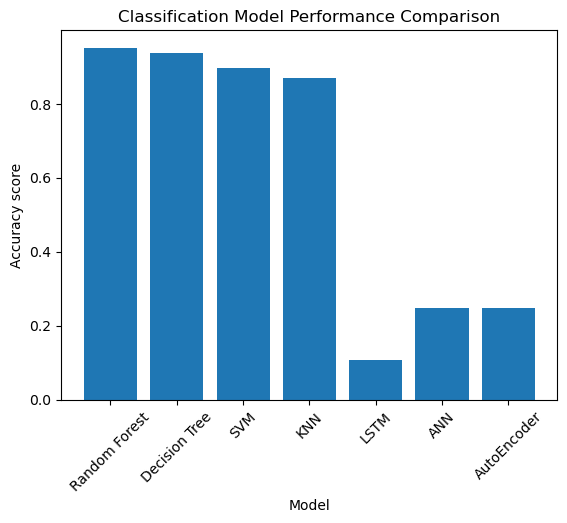

In [315]:
# Bar graph to show the best model for classification Task
cls_models = ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'LSTM','ANN', 'AutoEncoder']
cls_acc = [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy, lstm_accuracy, ann_accuracy,  autoenc_accuracy]
plt.bar(cls_models, cls_acc)
plt.title('Classification Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.xticks(rotation=45)
plt.show()

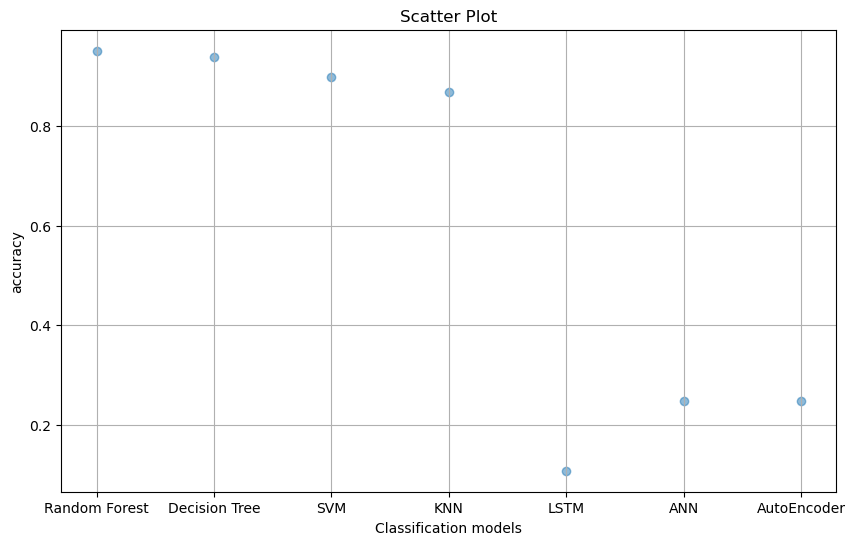

In [316]:
# Scatterplot to show the best model for classification Task
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

cls_models = ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'LSTM','ANN', 'AutoEncoder']
cls_acc = [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy, lstm_accuracy, ann_accuracy,  autoenc_accuracy]

plt.scatter(cls_models, cls_acc, alpha=0.5)  # Adjust the transparency (alpha) as needed
plt.title('Scatter Plot')
plt.xlabel('Classification models') 
plt.ylabel('accuracy')  
plt.grid(True)  

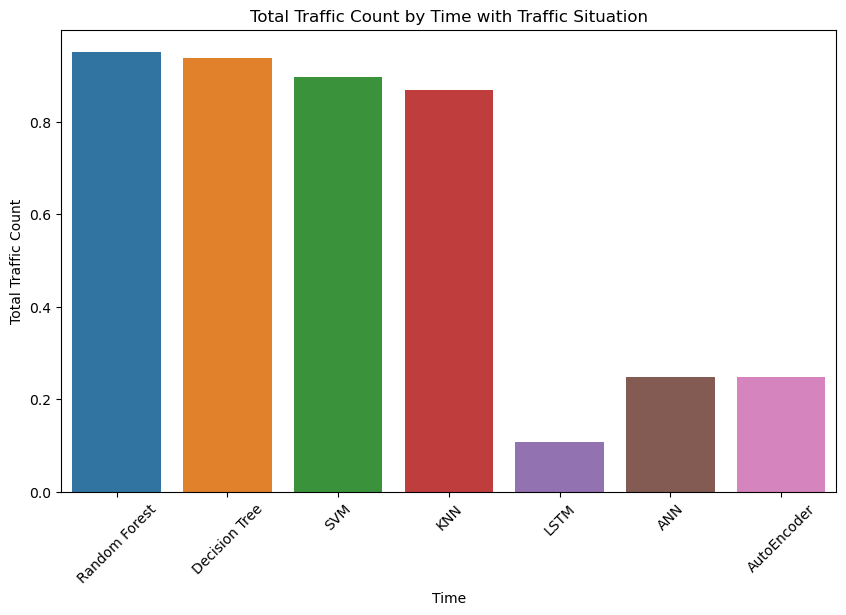

In [317]:
# Bar plot with hue to show the best model for classification Task
plt.figure(figsize=(10, 6))

data = {
    'cls_models' : ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'LSTM','ANN', 'AutoEncoder'],
    'cls_acc' : [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy, lstm_accuracy, ann_accuracy,  autoenc_accuracy],
}

sns.barplot(x='cls_models', y='cls_acc', data=data)
plt.title('Total Traffic Count by Time with Traffic Situation')
plt.xlabel('Time')
plt.ylabel('Total Traffic Count')
plt.xticks(rotation=45)
plt.show()

## For training:testing = 90:10

In [327]:
# Preprocessing
# Convert 'Time' column to numerical value (e.g., hour)
data['Time'] = pd.to_datetime(data['Time']).dt.hour

# Encoding categorical variables
encoder = LabelEncoder()
data['Day of the week'] = encoder.fit_transform(data['Day of the week'])

# Features and target variable for regression
# Splitting the dataset into features and target variable
X_reg = data.drop(columns=['Time', 'Date', 'Day of the week', 'Traffic Situation'])
y_reg = data['Traffic Situation']

# Features and target variable for classification
X_cls = data.drop(columns=['Total', 'Traffic Situation'])
y_cls = data['Traffic Situation']


# Assuming 'X' contains your features and 'y' contains your labels
# test_size=0.25 with 0.2 if you want an 90:10 ratio

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.1, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.1, random_state=42)


print("Training set size(for regression):", len(X_train_reg))
print("Testing set size(for regression):", len(X_test_reg))

print("Training set size(for classification):", len(X_train_cls))
print("Testing set size(for classification):", len(X_test_cls))

Training set size(for regression): 2678
Testing set size(for regression): 298
Training set size(for classification): 2678
Testing set size(for classification): 298


In [328]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_cls, y_train_cls)

# Evaluate the model
y_pred = rf_model.predict(X_test_cls)
rf_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", rf_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.9429530201342282
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
1178     0    22                2       146         23        23           4
1374     0    24                5       116         23        23           4
414      0    14                2       109         29        23           5
1091     0    21                3       139         36        40           3
2757     0     7                5       122         12        48          10
...    ...   ...              ...       ...        ...       ...         ...
930      0    19                4       100         38        36           9
2430     0     4                2       105         32        43           0
1465     0    25                6       113         16        50           2
2754     0     7                5       121         28        21           5
1600     0    26                4       127         27        40           5

[72 rows x 7 columns]


In [329]:
# Decision Tree

# Step 1: Training the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_cls, y_train_cls)

# Step 2: Making predictions
y_pred = model.predict(X_test_cls)

# Step 3: Evaluating the model
dt_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", dt_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.9463087248322147
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
1178     0    22                2       146         23        23           4
1374     0    24                5       116         23        23           4
1091     0    21                3       139         36        40           3
2757     0     7                5       122         12        48          10
1177     0    22                2       148         35        46           1
...    ...   ...              ...       ...        ...       ...         ...
2430     0     4                2       105         32        43           0
2720     0     7                5       106         19        38           4
1465     0    25                6       113         16        50           2
2754     0     7                5       121         28        21           5
1600     0    26                4       127         27        40           5

[72 rows x 7 columns]


In [330]:
# SVM
# Training the SVM model
model = SVC(kernel='linear')  
model.fit(X_train_cls, y_train_cls)

# Making predictions
y_pred = model.predict(X_test_cls)

#: Evaluating the model
svm_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", svm_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.9161073825503355
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
1178     0    22                2       146         23        23           4
414      0    14                2       109         29        23           5
1091     0    21                3       139         36        40           3
2757     0     7                5       122         12        48          10
1177     0    22                2       148         35        46           1
...    ...   ...              ...       ...        ...       ...         ...
930      0    19                4       100         38        36           9
2430     0     4                2       105         32        43           0
1465     0    25                6       113         16        50           2
2754     0     7                5       121         28        21           5
1600     0    26                4       127         27        40           5

[73 rows x 7 columns]


In [331]:
# KNN

# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

# Training the KNN model
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_scaled, y_train_cls)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
knn_accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", knn_accuracy)


# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Accuracy: 0.8825503355704698
Busy Hours:
       Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount
507      0    15                3       109         14        38           1
1178     0    22                2       146         23        23           4
1374     0    24                5       116         23        23           4
414      0    14                2       109         29        23           5
1091     0    21                3       139         36        40           3
...    ...   ...              ...       ...        ...       ...         ...
2720     0     7                5       106         19        38           4
1465     0    25                6       113         16        50           2
889      0    19                4       103         11        35           5
1600     0    26                4       127         27        40           5
700      0    17                5       113         11        32           1

[79 rows x 7 columns]


In [333]:
#LSTM

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_cls)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_encoded, test_size=0.1, random_state=0)

X_train_reshaped = X_train_cls.values.reshape((X_train_cls.shape[0], 1, X_train_cls.shape[1]))
X_test_reshaped = X_test_cls.values.reshape((X_test_cls.shape[0], 1, X_test_cls.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_cls, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_cls))

#y_pred = model.predict(X_test_reshaped)

# Evaluate the model on the test data
lstm_loss, lstm_accuracy = model.evaluate(X_test_reshaped, y_test_cls)
print("Test Loss:", lstm_loss)
print("Test Accuracy:", lstm_accuracy)


# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Epoch 1/10


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1140 - loss: -1.5118 - val_accuracy: 0.1242 - val_loss: -5.6643
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1005 - loss: -7.8805 - val_accuracy: 0.1242 - val_loss: -10.1867
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1047 - loss: -12.4093 - val_accuracy: 0.1242 - val_loss: -14.4109
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1145 - loss: -17.9599 - val_accuracy: 0.1242 - val_loss: -18.6565
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1124 - loss: -22.0889 - val_accuracy: 0.1242 - val_loss: -22.3403
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1083 - loss: -25.8689 - val_accuracy: 0.1242 - val_loss: -25.6817
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1146 - loss: -30.6627 - val_accuracy: 0.1242 - val_loss: -28.9837
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1083 - loss: -32.8787 - val_accuracy: 0.

In [334]:
# ANN

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_cls.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_cls, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
ann_loss, ann_accuracy = model.evaluate(X_test_scaled, y_test_cls)
print("Test Loss:", ann_loss)
print("Test Accuracy:", ann_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Epoch 1/10


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1336 - loss: -0.0614 - val_accuracy: 0.0970 - val_loss: -4.2336
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1126 - loss: -7.7821 - val_accuracy: 0.1866 - val_loss: -29.8885
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2074 - loss: -45.0828 - val_accuracy: 0.2351 - val_loss: -120.4953
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2384 - loss: -151.9561 - val_accuracy: 0.2537 - val_loss: -337.8359
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2426 - loss: -423.7213 - val_accuracy: 0.2649 - val_loss: -733.6394
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2743 - loss: -838.8507 - val_accuracy: 0.2780 - val_loss: -1357.6669
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2839 - loss: -1495.9974 - val_accuracy: 0.2817 - val_loss: -2243.8323
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2867 - loss: -2369.3479 - va

In [335]:
# Autoencoder

# Build the Autoencoder Model
input_dim = X_train_cls.shape[1]
encoding_dim = 32  # Set the size of the latent space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(input_layer, decoder)

# Compile the Model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
autoencoder.fit(X_train_cls, X_train_cls, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the Model
# Reconstruction loss
reconstruction_loss = autoencoder.evaluate(X_test_cls, X_test_cls)

# Visualize the Reconstructed Data
reconstructed_data = autoencoder.predict(X_test_cls)

# Evaluate the model
autoenc_loss, autoenc_accuracy = model.evaluate(X_test_scaled, y_test_cls)
print("Test Loss:", autoenc_loss)
print("Test Accuracy:", autoenc_accuracy)

# Identify busy hours
# Assuming busy hours are the ones predicted as 'heavy' by the model
busy_hours = X_test_cls[y_pred == 'heavy']
print("Busy Hours:\n", busy_hours)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1162.0745 - val_loss: 1148.2806
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1142.7568 - val_loss: 1148.2621
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1165.1823 - val_loss: 1148.2605
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1149.8328 - val_loss: 1148.2596
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1134.3558 - val_loss: 1148.2593
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1144.0562 - val_loss: 1148.2589
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1119.7377 - val_loss: 1148.2588
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1128.8634 - val_loss: 1148.2588
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1106.5955 - val_loss: 1148.2587
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1168.3896 - val_loss: 1148.2587
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1238.3070 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1

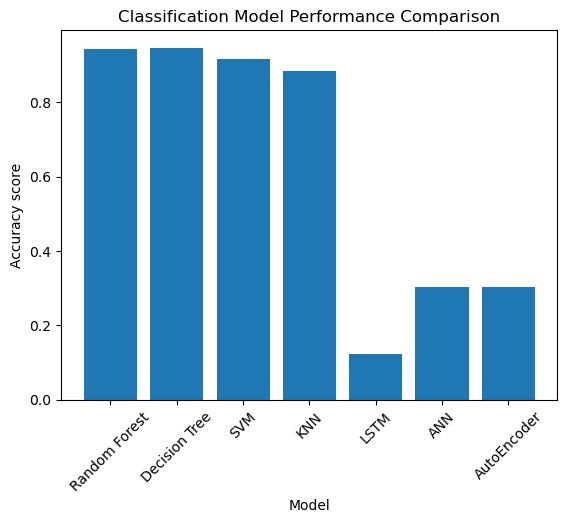

In [336]:
# Bar graph to show the best model for classification Task
cls_models = ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'LSTM','ANN', 'AutoEncoder']
cls_acc = [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy, lstm_accuracy, ann_accuracy,  autoenc_accuracy]
plt.bar(cls_models, cls_acc)
plt.title('Classification Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.xticks(rotation=45)
plt.show()

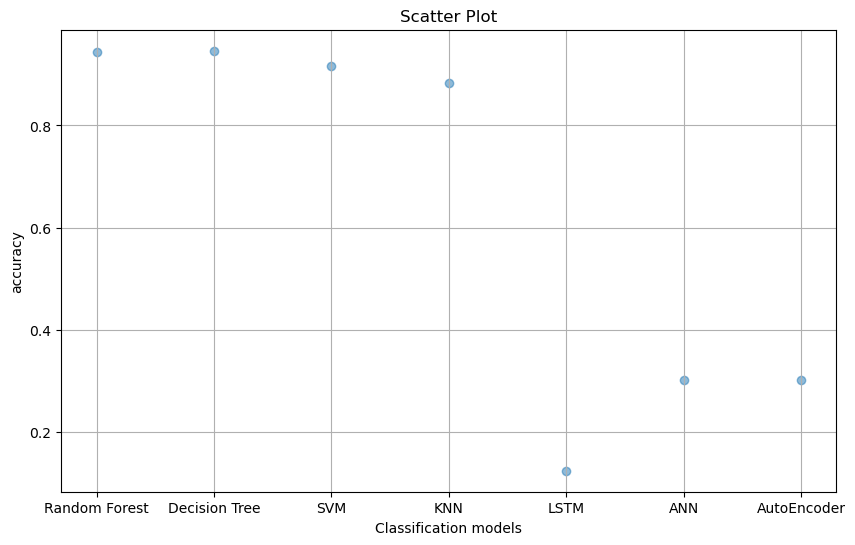

In [337]:
# Scatterplot to show the best model for classification Task
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

cls_models = ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'LSTM','ANN', 'AutoEncoder']
cls_acc = [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy, lstm_accuracy, ann_accuracy,  autoenc_accuracy]

plt.scatter(cls_models, cls_acc, alpha=0.5)  # Adjust the transparency (alpha) as needed
plt.title('Scatter Plot')
plt.xlabel('Classification models') 
plt.ylabel('accuracy')  
plt.grid(True)

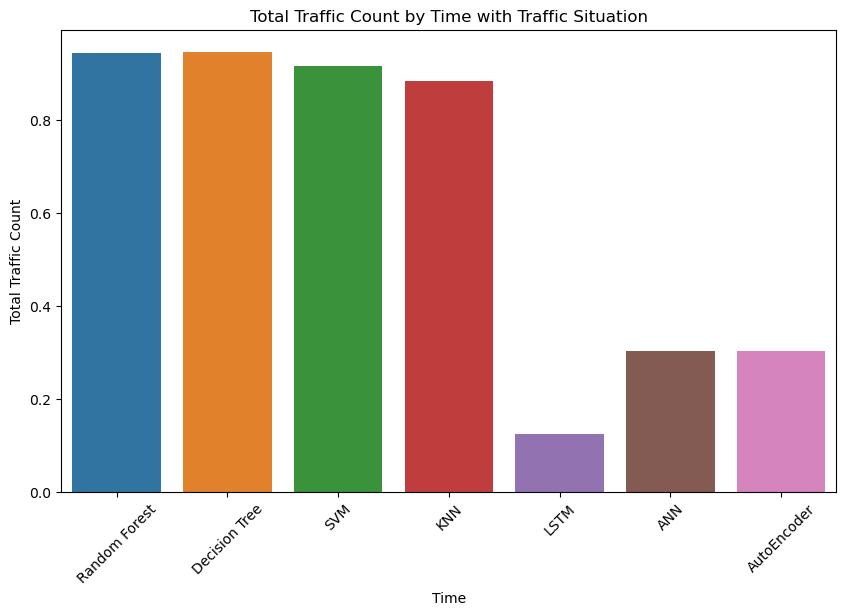

In [338]:
# Bar plot with hue to show the best model for classification Task
plt.figure(figsize=(10, 6))

data = {
    'cls_models' : ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'LSTM','ANN', 'AutoEncoder'],
    'cls_acc' : [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy, lstm_accuracy, ann_accuracy,  autoenc_accuracy],
}

sns.barplot(x='cls_models', y='cls_acc', data=data)
plt.title('Total Traffic Count by Time with Traffic Situation')
plt.xlabel('Time')
plt.ylabel('Total Traffic Count')
plt.xticks(rotation=45)
plt.show()

# Using different graphs to represent different attributes and values

In [374]:
df = pd.read_csv("Traffic.csv")

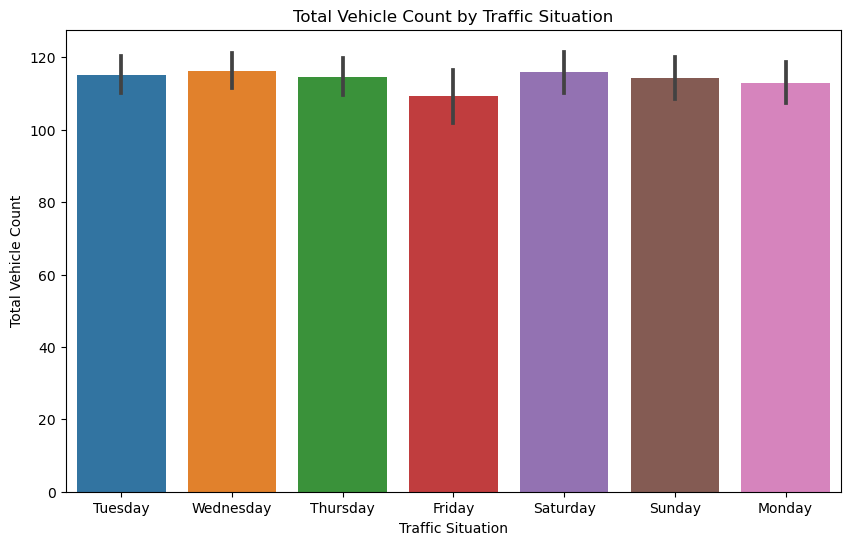

In [375]:
# Bar

plt.figure(figsize=(10, 6))
sns.barplot(x='Day of the week', y='Total', data=df)
plt.title('Total Vehicle Count by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Total Vehicle Count')
plt.show()

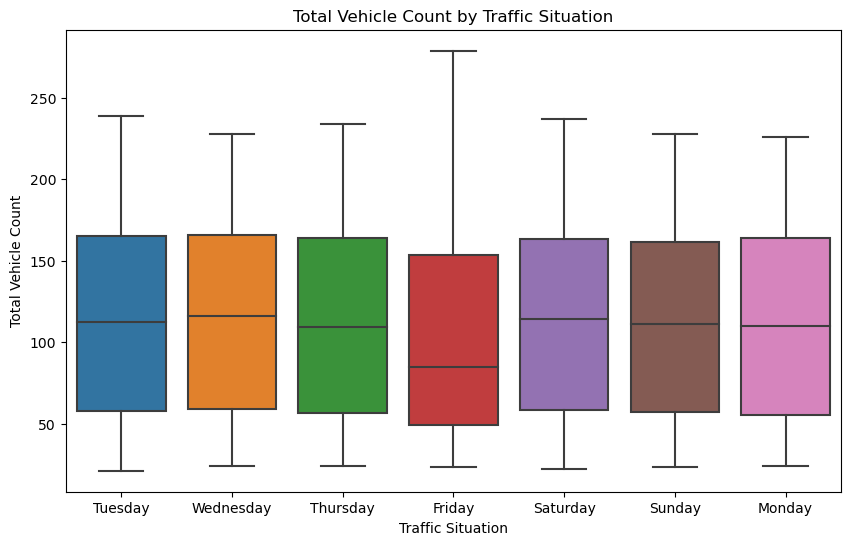

In [377]:
# Box Plot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of the week', y='Total', data=df)
plt.title('Total Vehicle Count by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Total Vehicle Count')
plt.show()

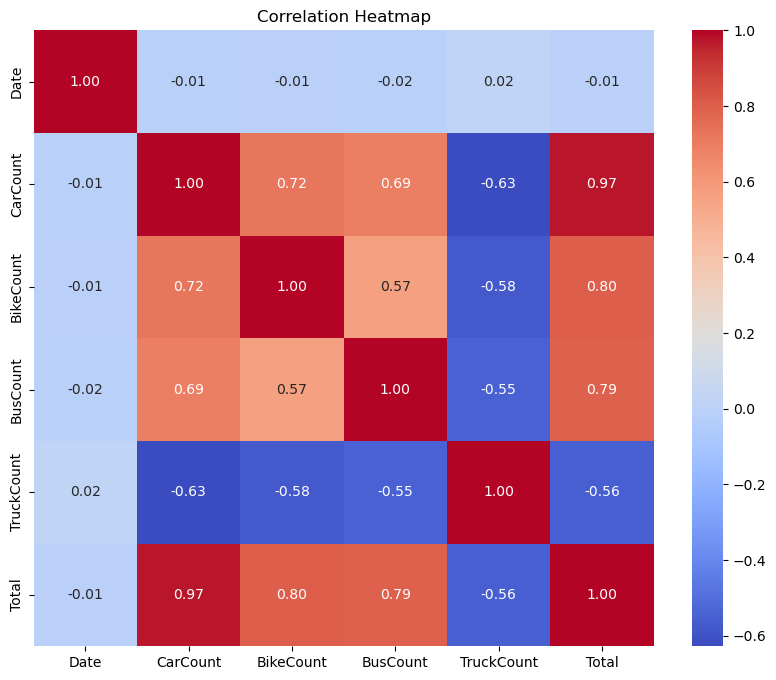

In [399]:
# Heat map

data['Time'] = pd.to_datetime(data['Time']).dt.hour * 3600 + pd.to_datetime(data['Time']).dt.minute * 60 + pd.to_datetime(data['Time']).dt.second
data_numeric = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


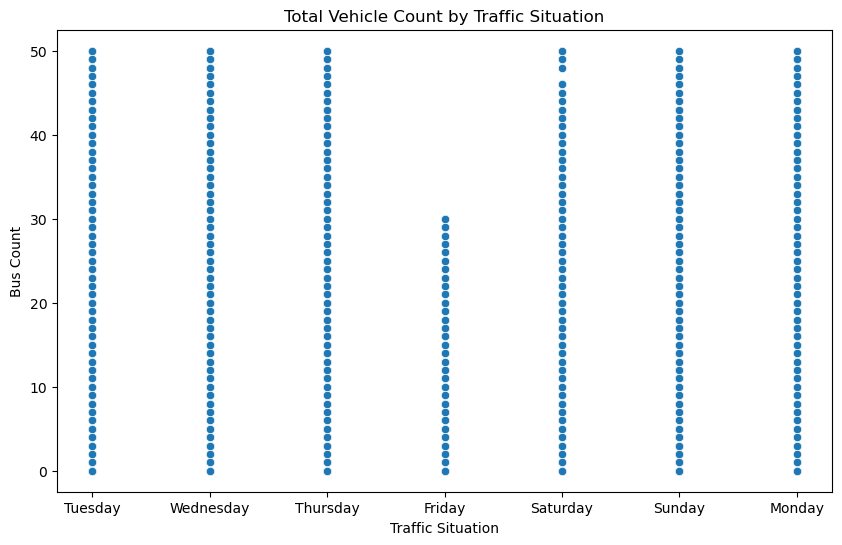

In [402]:
# Scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day of the week', y='BusCount', data=df)
plt.title('Total Vehicle Count by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Bus Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

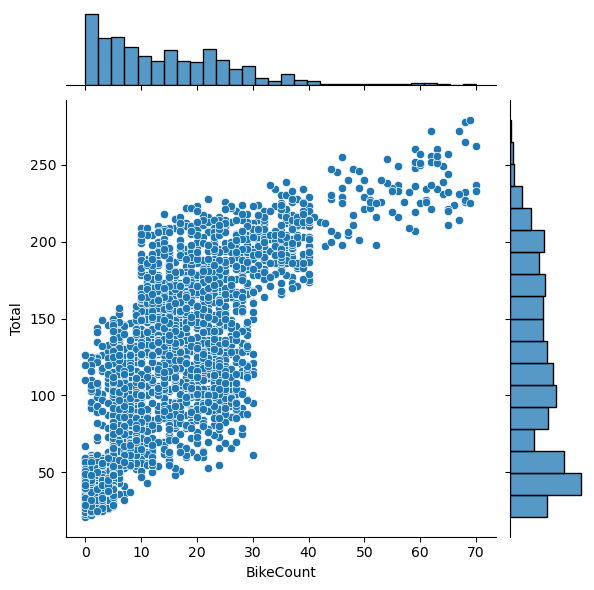

In [388]:
# Joint plot
plt.figure(figsize=(10, 6))
sns.jointplot(x='BikeCount', y='Total', data=df)
plt.show()

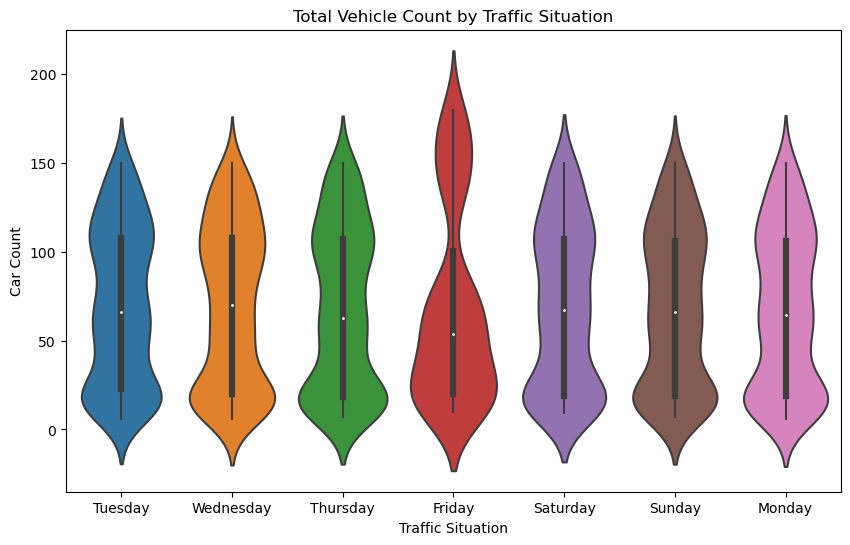

In [390]:
#Violin Plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='Day of the week', y='CarCount', data=df)
plt.title('Total Vehicle Count by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Car Count')
plt.show()

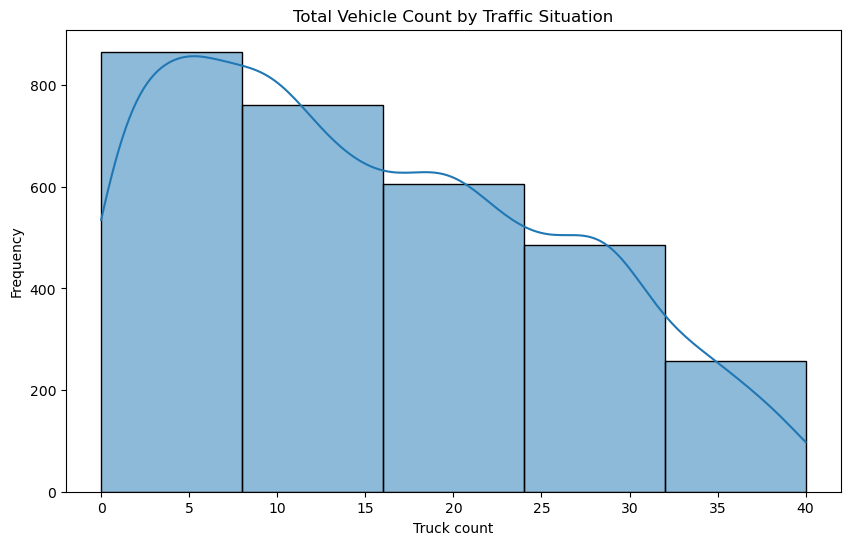

In [414]:
#Histogram

plt.figure(figsize=(10,6))
sns.histplot(df['TruckCount'], bins=5, kde=True)
plt.title('Total Vehicle Count by Traffic Situation')
plt.xlabel('Truck count')
plt.ylabel('Frequency')
plt.show()

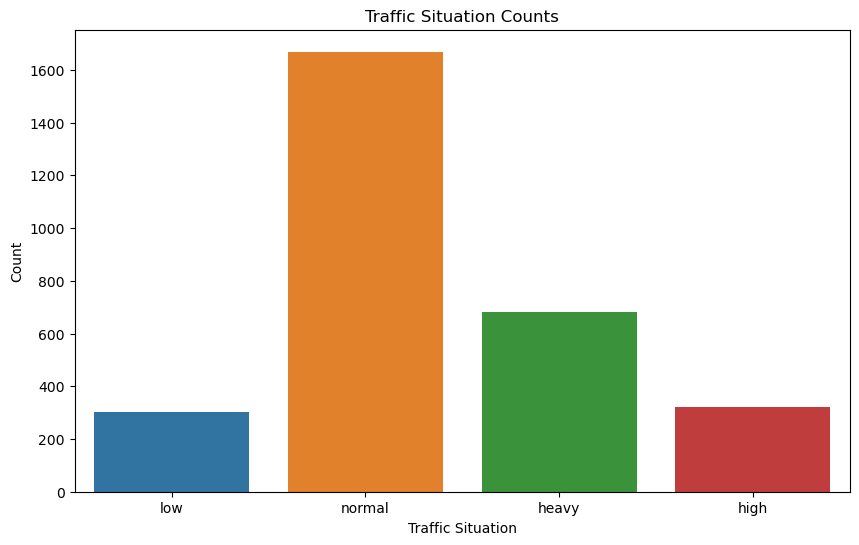

In [379]:
# Count plot

plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Traffic Situation Counts')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

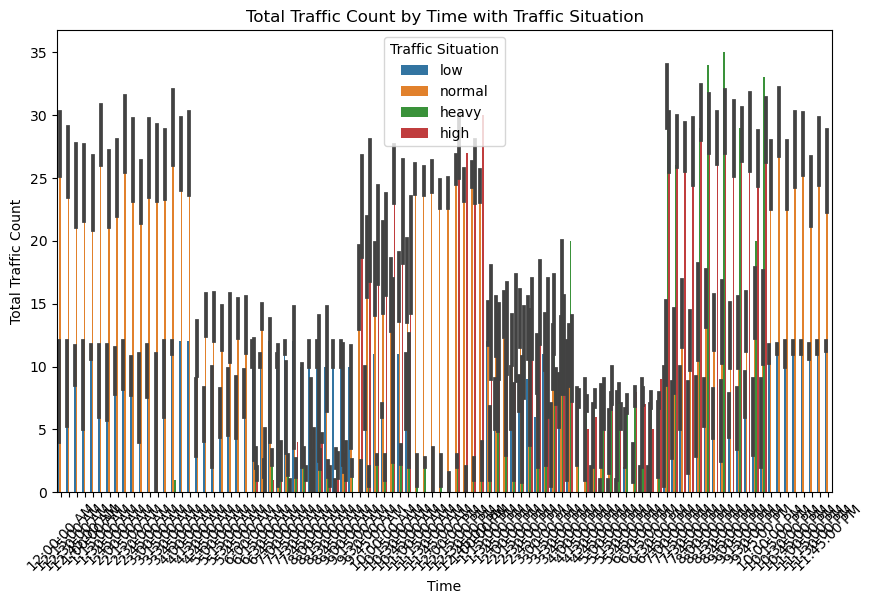

In [400]:
# Bar plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='Time', y='TruckCount', hue='Traffic Situation', data=df)
plt.title('Total Traffic Count by Time with Traffic Situation')
plt.xlabel('Time')
plt.ylabel('Total Traffic Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12656\2295714580.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Total'], shade=True)


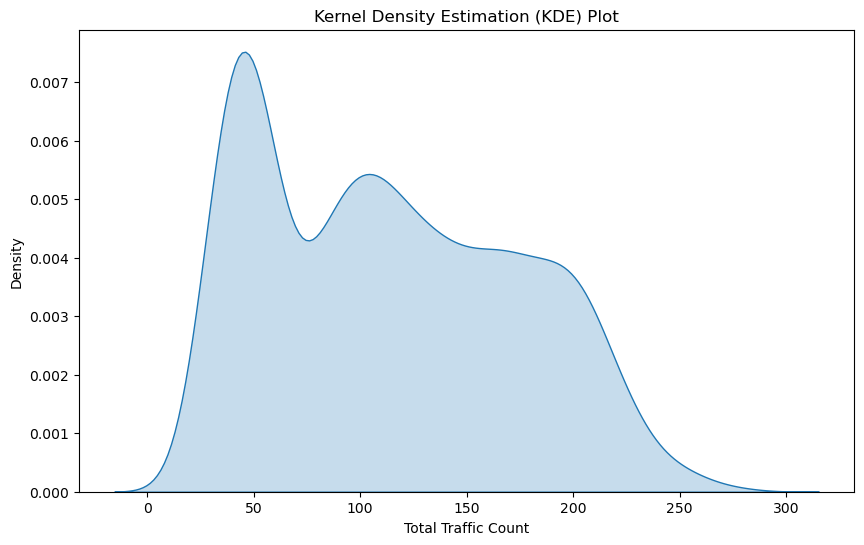

In [387]:
# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Total'], shade=True)
plt.title('Kernel Density Estimation (KDE) Plot')
plt.xlabel('Total Traffic Count')
plt.ylabel('Density')
plt.show()

In [75]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(data['Total'])

1. ADF :  -9.92671394316436
2. P-Value :  2.893989387247291e-17
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression: 2947
5. Critical Values :
	 1% :  -3.4325709043461807
	 5% :  -2.862521249177351
	 10% :  -2.5672923458339727


In [69]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['Total'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=28990.771, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=32836.941, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=29201.083, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=31045.672, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=37377.868, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=28989.013, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=30276.401, Time=0.99 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=28987.013, Time=0.82 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=28989.013, Time=1.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=29012.283, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29067.433, Time=0.23 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 6.518 seconds


In [70]:
print(data.shape)
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape,test.shape)

(2976, 9)
(2946, 9) (30, 9)


In [71]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv("Traffic.csv")
train = data['Total']

model = ARIMA(train, order=(2, 1, 1))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 2976
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -14533.020
Date:                Mon, 25 Mar 2024   AIC                          29074.040
Time:                        22:04:47   BIC                          29098.032
Sample:                             0   HQIC                         29082.673
                               - 2976                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0547      0.112      0.489      0.625      -0.165       0.274
ar.L2         -0.0098      0.044     -0.225      0.822      -0.096       0.076
ma.L1         -0.4150      0.112     -3.714      0.0

In [73]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Read the CSV file
df = pd.read_csv("Traffic.csv")

# Define and fit the SARIMA model
sarima_model = SARIMAX(df['Total'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                 2976
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -14472.121
Date:                            Mon, 25 Mar 2024   AIC                          28954.242
Time:                                    22:08:45   BIC                          28984.212
Sample:                                         0   HQIC                         28965.029
                                           - 2976                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0405      0.048      0.842      0.400      -0.054       0.135
ma.L1         -0.4053      0.047   

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.017137096774193547
Precision: 0.017901833444015833
F-score: 0.016804399323153897
Accuracy: 0.017137096774193547
G-mean: 0.017515291952051325


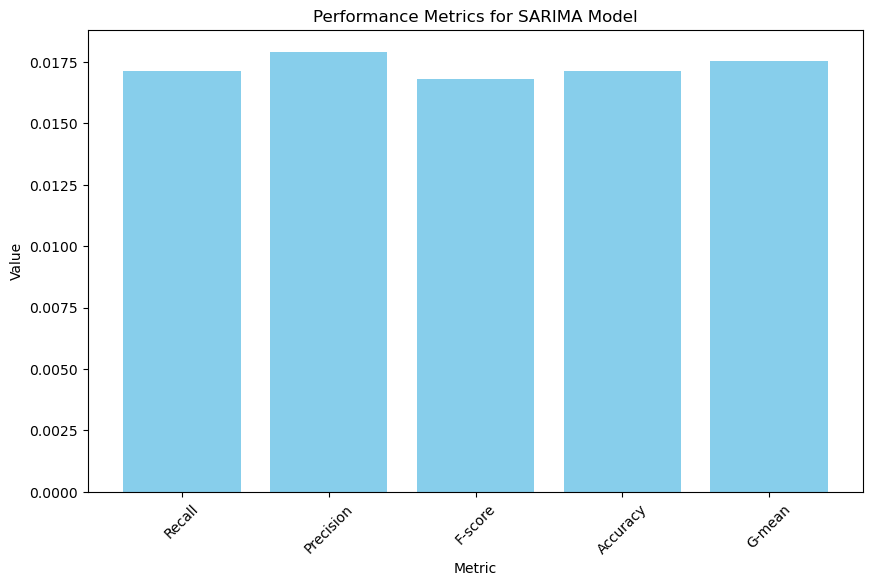

In [74]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the SARIMA predictions

# Make predictions
sarima_preds = sarima_fit.predict(start=df.index.min(), end=df.index.max())

# Round predictions to the nearest integer (as they might be fractional)
sarima_preds_rounded = sarima_preds.round().astype(int)

# Define the true values (assuming 'Total' is the true values column)
true_values = df['Total']

# Evaluate performance metrics
recall = recall_score(true_values, sarima_preds_rounded, average='weighted')
precision = precision_score(true_values, sarima_preds_rounded, average='weighted')
f1 = f1_score(true_values, sarima_preds_rounded, average='weighted')
accuracy = accuracy_score(true_values, sarima_preds_rounded)
gmean = np.sqrt(recall * precision)

# Print the performance metrics
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", f1)
print("Accuracy:", accuracy)
print("G-mean:", gmean)

# Create a DataFrame for the performance metrics
performance_df = pd.DataFrame({'Metric': ['Recall', 'Precision', 'F-score', 'Accuracy', 'G-mean'],
                               'Value': [recall, precision, f1, accuracy, gmean]})

# Plot the performance metrics
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Metric'], performance_df['Value'], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics for SARIMA Model')
plt.xticks(rotation=45)
plt.show()

# Regression models

In [142]:
data = pd.read_csv('Traffic.csv')
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Traffic Situation'] = encoder.fit_transform(data['Traffic Situation'])
data.head()                                                  

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,2
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,2
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,2
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,2
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,3


In [143]:
# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
# Select numerical features for normalization
numerical_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
scaler = MinMaxScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [144]:
# Extract hour of the day from the 'Time' column
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour
# Drop the original 'Time' column
data.drop('Time', axis=1, inplace=True)

data.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour
0,10,Tuesday,0.143678,0.000000,0.08,0.100,0.069767,2,0
1,10,Tuesday,0.247126,0.000000,0.06,0.075,0.131783,2,0
2,10,Tuesday,0.229885,0.000000,0.06,0.150,0.131783,2,0
3,10,Tuesday,0.258621,0.000000,0.04,0.125,0.143411,2,0
4,10,Tuesday,0.293103,0.085714,0.30,0.400,0.282946,3,1


In [134]:
# Split the dataset into training and testing sets with shuffling
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)
X = data.drop('Traffic Situation', axis=1) # Features
y = data['Traffic Situation'] # Target variable
X_day = data.drop('Day of the week', axis=1) # Features
y_day = data['Day of the week'] # Target variable
# Split the dataset into training and testing sets (80% train, 20% test) with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of training target variable:", y_train.shape)
print("Shape of testing target variable:", y_test.shape)

Shape of training features: (2380, 8)
Shape of testing features: (596, 8)
Shape of training target variable: (2380,)
Shape of testing target variable: (596,)


In [135]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Encoding categorical variables
encoder = LabelEncoder()
data['Day of the week'] = encoder.fit_transform(data['Day of the week'])

X,y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Model Evaluation:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)

Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.014997818791946307
R-squared (R2): 0.9901784660424352


In [136]:
#Decision Tree Regression 

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Model Evaluation:")
print("Mean Squared Error (MSE):", mse_dt)
print("R-squared (R2):", r2_dt)

Decision Tree Model Evaluation:
Mean Squared Error (MSE): 0.0
R-squared (R2): 1.0


In [137]:
#SVM

from sklearn.svm import SVR
svm_model = SVR(kernel='rbf') # Example: Radial Basis Function (RBF) kernel
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print("SVM Model Evaluation:")
print("Mean Squared Error (MSE):", mse_svm)
print("R-squared (R2):", r2_svm)

SVM Model Evaluation:
Mean Squared Error (MSE): 0.7279128847283467
R-squared (R2): 0.5233159424924194


In [138]:
#KNN

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5) # Example: 5 neighbors
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN Model Evaluation:")
print("Mean Squared Error (MSE):", mse_knn)
print("R-squared (R2):", r2_knn)

KNN Model Evaluation:
Mean Squared Error (MSE): 0.6347651006711409
R-squared (R2): 0.5843150875601694


In [139]:
#ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
input_layer = Input(shape=(X_train.shape[1],))
ann_model = Sequential()
ann_model.add(input_layer)
ann_model.add(Dense(units=128, activation='relu'))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dense(units=1))
ann_model.compile(optimizer='adam', loss='mean_squared_error')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
history = ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
mse_ann = ann_model.evaluate(X_test_scaled, y_test)
y_pred_ann = ann_model.predict(X_test_scaled)
r2_ann = r2_score(y_test,y_pred_ann)

print("ANN Model Evaluation:")
print("Mean Swuared Error (MSE):", mse_ann)
print("R squared (R2):", r2_ann)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0854 - val_loss: 0.6683
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7529 - val_loss: 0.5023
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5527 - val_loss: 0.4198
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4550 - val_loss: 0.3738
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3843 - val_loss: 0.3398
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3402 - val_loss: 0.3148
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2883 - val_loss: 0.3118
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2979 - val_loss: 0.2778
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2637 - val_loss: 0.2664
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2519 - val_loss: 0.2473
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.2760
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
ANN Model Evaluation:
Mean Swuared Error (MSE): 0.2981514036655

In [128]:
#Autoencoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the dimensionality of your input data
input_dim = X_train_scaled.shape[1]
# Define the autoencoder architecture
autoencoder = Sequential([
# Encoder layers
Dense(units=32, activation='relu', input_shape=(input_dim,)),
Dense(units=16, activation='relu'),
# Bottleneck layer
Dense(units=8, activation='relu'),
# Decoder layers
Dense(units=16, activation='relu'),
Dense(units=32, activation='relu'),
# Output layer
Dense(units=input_dim, activation='sigmoid')
])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2273 - val_loss: 1.0936
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9715 - val_loss: 0.7913
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7568 - val_loss: 0.7035
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6774 - val_loss: 0.6647
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6526 - val_loss: 0.6301
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6201 - val_loss: 0.6174
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6063 - val_loss: 0.6108
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5934 - val_loss: 0.6028
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5725 - val_loss: 0.5926
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5693 - val_loss: 0.5850


In [148]:
'''from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
#ratios = [(0.8, 0.2)]
# Define a function to train and evaluate models
def train_evaluate_model(X, y, model):
    print("Model:", model)
    for train_ratio, test_ratio in ratios:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
# Train the model
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_predict = model.predict(X_test)

        train_mse = mean_squared_error(y_train, y_pred)
        test_mse = mean_squared_error(y_train, y_pred)
        print(f"Train:Test:: {train_ratio:.2f}/{test_ratio:.2f}")
        print(f"Train MSE: {train_mse: .4f}, Test MSE: {test_mse:.4f}")
        print()
models = [RandomForestRegressor(), DecisionTreeRegressor(), SVR()]

for model in models:
    train_evaluate_model(X, y, model)'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\n\nX_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)\n#ratios = [(0.8, 0.2)]\n# Define a function to train and evaluate models\ndef train_evaluate_model(X, y, model):\n    print("Model:", model)\n    for train_ratio, test_ratio in ratios:\n        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)\n# Train the model\n        model.fit(X_train, y_train)\n        train_pred = model.predict(X_train)\n        test_predict = model.predict(X_test)\n\n        train_mse = mean_squared_error(y_train, y_pred)\n        test_mse = mean_squared_error(y_train, y_pred)\n        print(f"Train:Test:: {train_ratio:.2f}/{test_ratio:.2f}")\n        print(f"Train MSE: {train_mse: .4f}, Test MSE: {test_mse:.4f}")\n        print()\nmodels = [RandomForestRegressor(), DecisionTreeR